In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [12]:
data = pd.read_csv('dataset/User_Data.csv')
print('Shape:',data.shape)
print(data.isnull().sum())
print(data.columns)
X = data.iloc[:,2:4]
y = data.iloc[:,4]
print(X.head())
X.describe()

Shape: (400, 5)
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [15]:
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)
pd.DataFrame(Xs).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


In [16]:
X_train,X_test,y_train,y_test=train_test_split(Xs,y,random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64


In [17]:
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Accuracy:\n',accuracy_score(y_test,y_pred)*100)
age = 20
salary = 20000
new = np.array([[age,salary]])
new = scaler.transform(new)
pred = classifier.predict(new)
if pred[0] == 1:
    print("Will purchase the item")
else:
    print("Will not purchase the item")


Confusion Matrix [[67  1]
 [10 22]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100

Accuracy:
 89.0
Will not purchase the item


c:\python\python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[67  1]
 [10 22]]
Accuracy: 89.0
Sensitivity: 98.52941176470588
Specificity: 68.75


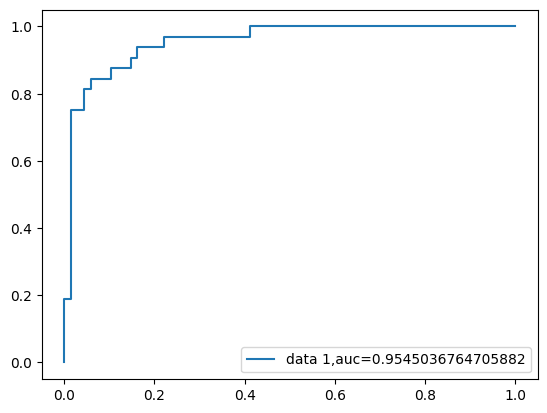

In [21]:

y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba*100

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
cm = confusion_matrix(y_test,y_pred)
print(cm)

accuracy = (cm[0,0]+cm[1,1])/len(X_test)
print('Accuracy:',accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity:',sensitivity*100)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity:',specificity*100)


scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
